In [1]:
import numpy as np
from matplotlib import pyplot as plt
# plt.style.use('seaborn')

In [2]:
def random_data_sample_3d(num_classes = 3, num_samples = 100, centers_range = (-10, 10)):
    centers = np.random.randint(centers_range[0], centers_range[1], (num_classes, 3))
    data = [np.random.randn(num_samples, 3)] * num_classes
    return np.concatenate(data + np.reshape(centers, (num_classes, 1, 3)))

In [3]:
def plot_clusters(data, centers):
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker = '.', s = 10, color = (0., .7, 1., .4), label = 'Data')
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker = 'o', s = 50, color = (1., 0., 0., 1.), label = 'Center')
    ax.view_init(elev = 20., azim = -45.)
    plt.legend()
    plt.show()

In [4]:
data = random_data_sample_3d(
	num_classes = 5,
    num_samples = 200,
    centers_range = (-5, 3)
)

n_clusters = 5
max_itr = 50
min_error = 2e-5

n_data = data.shape[0]
n_features = data.shape[1]

mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)

centers = np.random.randn(n_clusters, n_features) * std + mean

In [5]:
i = 0
err = 1e+5
while (i < max_itr) and (err > min_error):
    distances = np.linalg.norm(np.stack([data] * n_clusters, axis = 1) - np.stack([centers] * n_data, axis = 0), axis = 2)
    clusters = np.argmin(distances, axis = 1)
    centers_temp = []
    for i in range(n_clusters):
        centers_temp.append(np.mean(data[np.where(np.equal(clusters, i))], axis = 0))
    centers_temp = np.stack(centers_temp)
    err = np.linalg.norm(centers - centers_temp)
    centers = centers_temp
    i += 1

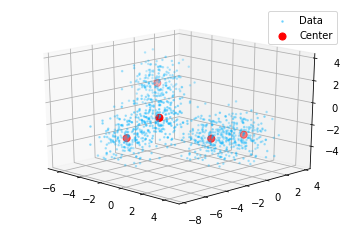

In [6]:
plot_clusters(data, centers)